In [35]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import spacy 
import string
import wordcloud
import nltk
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud,STOPWORDS
import re
import warnings
import seaborn as sns

warnings.filterwarnings('ignore')


In [36]:
musk=pd.read_csv("elon_musk.csv")

In [37]:
musk.drop(['Unnamed: 0'],axis=1)

,Text
0,@kunalb11 I�m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


### Text PreProcessing

In [38]:
musk=[Text.strip() for Text in musk.Text]
musk=[Text for Text in musk if Text]
musk[0:10]

['@kunalb11 I�m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

### Joining the list into one string/text

In [39]:
sentence=' '.join(musk)
sentence

'@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

### Removing Punctuations

In [40]:
no_punc_text =sentence.translate(str.maketrans('', '', string.punctuation))
no_punc_text

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox httpstco9WFKMYu2oj Frodo was the underdoge\nAll thought he would fail\nHimself most of all httpstcozGxJFDzzrM OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest httpstco3rWE9uHSTS geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha httpstcoFc9uhQSd7O freewalletorg

### Removing URLs

In [41]:
url_https = re.sub(r'http\S+','',no_punc_text)
url_https

'kunalb11 I�m an alien IDAACarmack Ray tracing on Cyberpunk with HDR is nextlevel Have you tried it joerogan Spotify Great interview gtera27 Doge is underestimated teslacn Congratulations Tesla China for amazing execution last year Now on to the next for even more Happy New Year of the Ox  Frodo was the underdoge\nAll thought he would fail\nHimself most of all  OwenSparks flcnhvy anonyx10 Haha thanks  flcnhvy anonyx10 Indeed Tweets definitely do not represent realworld time allocation The most entertaining outcome is the most likely GiveDirectly Just sent some Just agree to do Clubhouse with kanyewest  geoffkeighley UnrealEngine It�s getting real Bought some Dogecoin for lil X so he can be a toddler hodler JoshManMode He definitely has issues but the sentencing seems a bit high freewalletorg Thanks for fixing freewalletorg Please unlock my account AstroJordy U0001F923U0001F923 This is true power haha  freewalletorg Any crypto wallet that won�t give you your private keys should be avoid

In [42]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to C:\Users\Damanjeet
[nltk_data]     kaur.LAPTOP-B5CHJ9SC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Damanjeet
[nltk_data]     kaur.LAPTOP-B5CHJ9SC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Tokenizing

In [43]:
text_tokens =word_tokenize(url_https)
print(text_tokens)

['kunalb11', 'I�m', 'an', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'is', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'GiveDirectly', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It�s', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X',

In [44]:
len(text_tokens)

20466

### Removing stopwords

In [45]:
stopwords= pd.read_csv('stop.txt',encoding='Latin')
stopwords.head()

,a
0,a's
1,able
2,about
3,above
4,according


In [46]:
from nltk.corpus import stopwords
my_stop_words= stopwords.words('english')
sw_list=['\x92','\x92s','\x96','NASA\x92s','U2192','Yeah','U0001F476','It\x92s','haha','Yes','U0001F923','I','2021','I\x92m','U0001F923U0001F923','g','U0001F923U0001F923XPrize','U0001F923U0001F923flcnhvy','i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't",'u','tradeintobyliiiiiiiiii']
my_stop_words.extend(sw_list)

In [47]:
no_stop_tokens=[word for word in text_tokens if not word in my_stop_words]
print(no_stop_tokens)

['kunalb11', 'I�m', 'alien', 'IDAACarmack', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'joerogan', 'Spotify', 'Great', 'interview', 'gtera27', 'Doge', 'underestimated', 'teslacn', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'OwenSparks', 'flcnhvy', 'anonyx10', 'Haha', 'thanks', 'flcnhvy', 'anonyx10', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'GiveDirectly', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'kanyewest', 'geoffkeighley', 'UnrealEngine', 'It�s', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'JoshManMode', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'Thanks', 'fixing', 'freewalletorg', 'Please', 'unlock', 'account', 'AstroJordy', 'This', 'true', 'powe

In [48]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### Normalizing Data

In [49]:
lower_words = [x.lower() for x in no_stop_tokens]
print(lower_words)

['kunalb11', 'i�m', 'alien', 'idaacarmack', 'ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tried', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimated', 'teslacn', 'congratulations', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owensparks', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'sent', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it�s', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'freewalletorg', 'thanks', 'fixing', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'powe

### Stemming Words

In [50]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_tokens = [ps.stem(word) for word in lower_words]
print(stemmed_tokens)

['kunalb11', 'i�m', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'tri', 'joerogan', 'spotifi', 'great', 'interview', 'gtera27', 'doge', 'underestim', 'teslacn', 'congratul', 'tesla', 'china', 'amaz', 'execut', 'last', 'year', 'now', 'next', 'even', 'happi', 'new', 'year', 'ox', 'frodo', 'underdog', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvi', 'anonyx10', 'haha', 'thank', 'flcnhvi', 'anonyx10', 'inde', 'tweet', 'definit', 'repres', 'realworld', 'time', 'alloc', 'the', 'entertain', 'outcom', 'like', 'givedirectli', 'just', 'sent', 'just', 'agre', 'clubhous', 'kanyewest', 'geoffkeighley', 'unrealengin', 'it�', 'get', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmod', 'he', 'definit', 'issu', 'sentenc', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'pleas', 'unlock', 'account', 'astrojordi', 'thi', 'true', 'power', 'freewalletorg', 'ani', 'crypto', 'wallet', 'won�t', 'give', 'p

In [51]:
nlp = spacy.load("en_core_web_sm") 
doc = nlp(' '.join(lower_words))
print(doc)

kunalb11 i�m alien idaacarmack ray tracing cyberpunk hdr nextlevel have tried joerogan spotify great interview gtera27 doge underestimated teslacn congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself owensparks flcnhvy anonyx10 haha thanks flcnhvy anonyx10 indeed tweets definitely represent realworld time allocation the entertaining outcome likely givedirectly just sent just agree clubhouse kanyewest geoffkeighley unrealengine it�s getting real bought dogecoin lil x toddler hodler joshmanmode he definitely issues sentencing seems bit high freewalletorg thanks fixing freewalletorg please unlock account astrojordy this true power freewalletorg any crypto wallet won�t give private keys avoided costs freewalletorg your app sucks rt spacex nasa selected falcon heavy launch first two elements lunar gateway together one mission ajtourville blkmdl3 rationaletienne adamklotz once predict cash flow reasonably well 

### Lemmentanizing Data

In [52]:
lemmas = [token.lemma_ for token in doc]
print(lemmas)

['kunalb11', 'I', '�', 'm', 'alien', 'idaacarmack', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'joerogan', 'spotify', 'great', 'interview', 'gtera27', 'doge', 'underestimate', 'teslacn', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'owenspark', 'flcnhvy', 'anonyx10', 'haha', 'thanks', 'flcnhvy', 'anonyx10', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'givedirectly', 'just', 'send', 'just', 'agree', 'clubhouse', 'kanyewest', 'geoffkeighley', 'unrealengine', 'it', '�', 's', 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'joshmanmode', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'freewalletorg', 'thank', 'fix', 'freewalletorg', 'please', 'unlock', 'account', 'astrojordy', 'this', 'true', 'power', '

In [53]:
stop_word2= stopwords.words('english')
sw_list_2=['shippingtobyliiiiiiiiii','tobyliiiiiiiiii','showtobyliiiiiiiiii','\x93hop','djsnm','j',]
stop_word2.extend(lemmas)
stop_word2

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [54]:
clean_text=' '.join(stop_word2)
clean_text

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't kunalb11 I � m alien idaacarmack ray trace cyberpunk hdr nextle

### Feature Extraction

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(stop_word2)

In [56]:
print(vectorizer.vocabulary_)

{'me': 2311, 'my': 2465, 'myself': 2466, 'we': 4167, 'our': 2650, 'ours': 2651, 'ourselves': 2652, 'you': 4298, 're': 2987, 've': 4083, 'll': 2169, 'your': 4301, 'yours': 4304, 'yourself': 4305, 'yourselves': 4306, 'he': 1686, 'him': 1733, 'his': 1738, 'himself': 1735, 'she': 3284, 'her': 1710, 'hers': 1713, 'herself': 1714, 'it': 1934, 'its': 1936, 'itself': 1938, 'they': 3763, 'them': 3748, 'their': 3745, 'theirs': 3746, 'themselves': 3749, 'what': 4191, 'which': 4202, 'who': 4207, 'whom': 4212, 'this': 3769, 'that': 3735, 'these': 3760, 'those': 3772, 'am': 255, 'is': 1927, 'are': 330, 'was': 4156, 'were': 4186, 'be': 473, 'been': 482, 'being': 494, 'have': 1678, 'has': 1672, 'had': 1647, 'having': 1680, 'do': 1115, 'does': 1119, 'did': 1071, 'doing': 1127, 'an': 267, 'the': 3739, 'and': 274, 'but': 635, 'if': 1807, 'or': 2637, 'because': 479, 'as': 347, 'until': 4041, 'while': 4203, 'of': 2594, 'at': 378, 'by': 642, 'for': 1465, 'with': 4245, 'about': 127, 'against': 197, 'between'

In [57]:
print(vectorizer.get_feature_names())
print(X.toarray())

['005', '10', '100', '1000', '10000', '107', '10x', '11', '112', '11thhour', '12', '122', '13', '130pm', '13arm13arm', '13ericralph31', '14', '140pm', '149watt', '14yearold', '15', '150', '155', '16', '162', '17', '18', '1880s', '1b', '1matthewgarcia', '1st', '1stprinciples4l', '20', '200', '2007', '2008', '2009', '2012', '2017', '2020', '2024', '2026', '2030', '20k', '210', '218', '21st', '22', '225', '23', '230', '24', '240am', '247teslanews', '25', '250', '250kw', '25d', '25gunsteslacom', '25k', '25th', '28', '28delayslater', '28th', '29', '2k', '2nd', '2v', '30', '300', '301', '304', '304l', '31', '33', '330', '360', '37', '3800', '394', '39a', '3d', '3rd', '40', '400', '42', '420', '4227', '430', '43rd', '445pm', '448', '4530000', '45thspacewing', '4680', '479000', '48', '4d', '4th', '4thfromourstar', '50', '50000', '50k', '60', '60000', '65', '69420', '6f', '6k', '727', '727pm', '74', '78', '7th', '90', '9007', '91demigod', '922', '948', '95', '99', '9inety6prince', 'aber', 'able

In [58]:
print(X.toarray().shape)

(16240, 4325)


In [59]:
vectorizer_ngram_range = CountVectorizer(analyzer='word',ngram_range=(1,3),max_features = 100)
bow_matrix_ngram =vectorizer_ngram_range.fit_transform(stop_word2)

In [60]:
print(vectorizer_ngram_range.get_feature_names())
print(bow_matrix_ngram.toarray())

['actually', 'ajtourville', 'also', 'amp', 'austinbarnard45', 'be', 'big', 'car', 'cleantechnica', 'come', 'could', 'crew', 'day', 'don', 'dragon', 'earth', 'engine', 'ercxspace', 'erdayastronaut', 'evafoxu', 'exactly', 'falcon', 'felixschlang', 'first', 'flcnhvy', 'flight', 'get', 'go', 'good', 'great', 'haha', 'hard', 'high', 'idaacarmack', 'it', 'kristennetten', 'land', 'launch', 'lexfridman', 'like', 'lot', 'make', 'marcushousegame', 'maybe', 'mission', 'model', 'much', 'nasa', 'nasaspaceflight', 'need', 'neuralink', 'new', 'next', 'no', 'not', 'one', 'people', 'ppathole', 'pretty', 'probably', 'production', 'rationaletienne', 're', 'right', 'rt', 'soon', 'space', 'spacestation', 'spacex', 'starship', 'still', 'sure', 'take', 'tesla', 'teslaownerssv', 'teslarati', 'tesmaniancom', 'test', 'thank', 'that', 'the', 'there', 'thesheetztweetz', 'they', 'think', 'this', 'time', 'tobyliiiiiiiiii', 'true', 'use', 'way', 'we', 'week', 'well', 'wholemarsblog', 'will', 'work', 'would', 'year',

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer_n_gram_max_features = TfidfVectorizer(norm="l2",analyzer='word', ngram_range=(1,3), max_features = 500)
tf_idf_matrix_n_gram_max_features =vectorizer_n_gram_max_features.fit_transform(stop_word2)
print(vectorizer_n_gram_max_features.get_feature_names())
print(tf_idf_matrix_n_gram_max_features.toarray())

['10', '100', '13', '20', '28delayslater', '30', '60', 'able', 'absolutely', 'accurate', 'actually', 'adamklotz', 'add', 'agree', 'ai', 'air', 'ajtourville', 'all', 'almost', 'already', 'also', 'although', 'amazing', 'amp', 'and', 'another', 'appear', 'apply', 'appreciate', 'archillect', 'around', 'article', 'as', 'astrobehnken', 'astrodoug', 'astrojordy', 'astronaut', 'at', 'austinbarnard45', 'autopilot', 'awesome', 'back', 'bad', 'bar', 'base', 'battery', 'be', 'benmezrich', 'berlin', 'berniesander', 'beta', 'big', 'bit', 'boca', 'bocachicagal', 'body', 'booster', 'boringcompany', 'build', 'but', 'buy', 'call', 'camera', 'can', 'car', 'cargo', 'casparstanley', 'cbass3d', 'cell', 'change', 'cleantechnica', 'close', 'cold', 'come', 'company', 'complete', 'computer', 'confirm', 'congratulation', 'control', 'cool', 'cost', 'could', 'course', 'create', 'crew', 'crew1', 'cyberpunkgame', 'cybertruck', 'day', 'deep', 'definitely', 'design', 'didn', 'difference', 'different', 'djsnm', 'dmcrya

### WordCloud

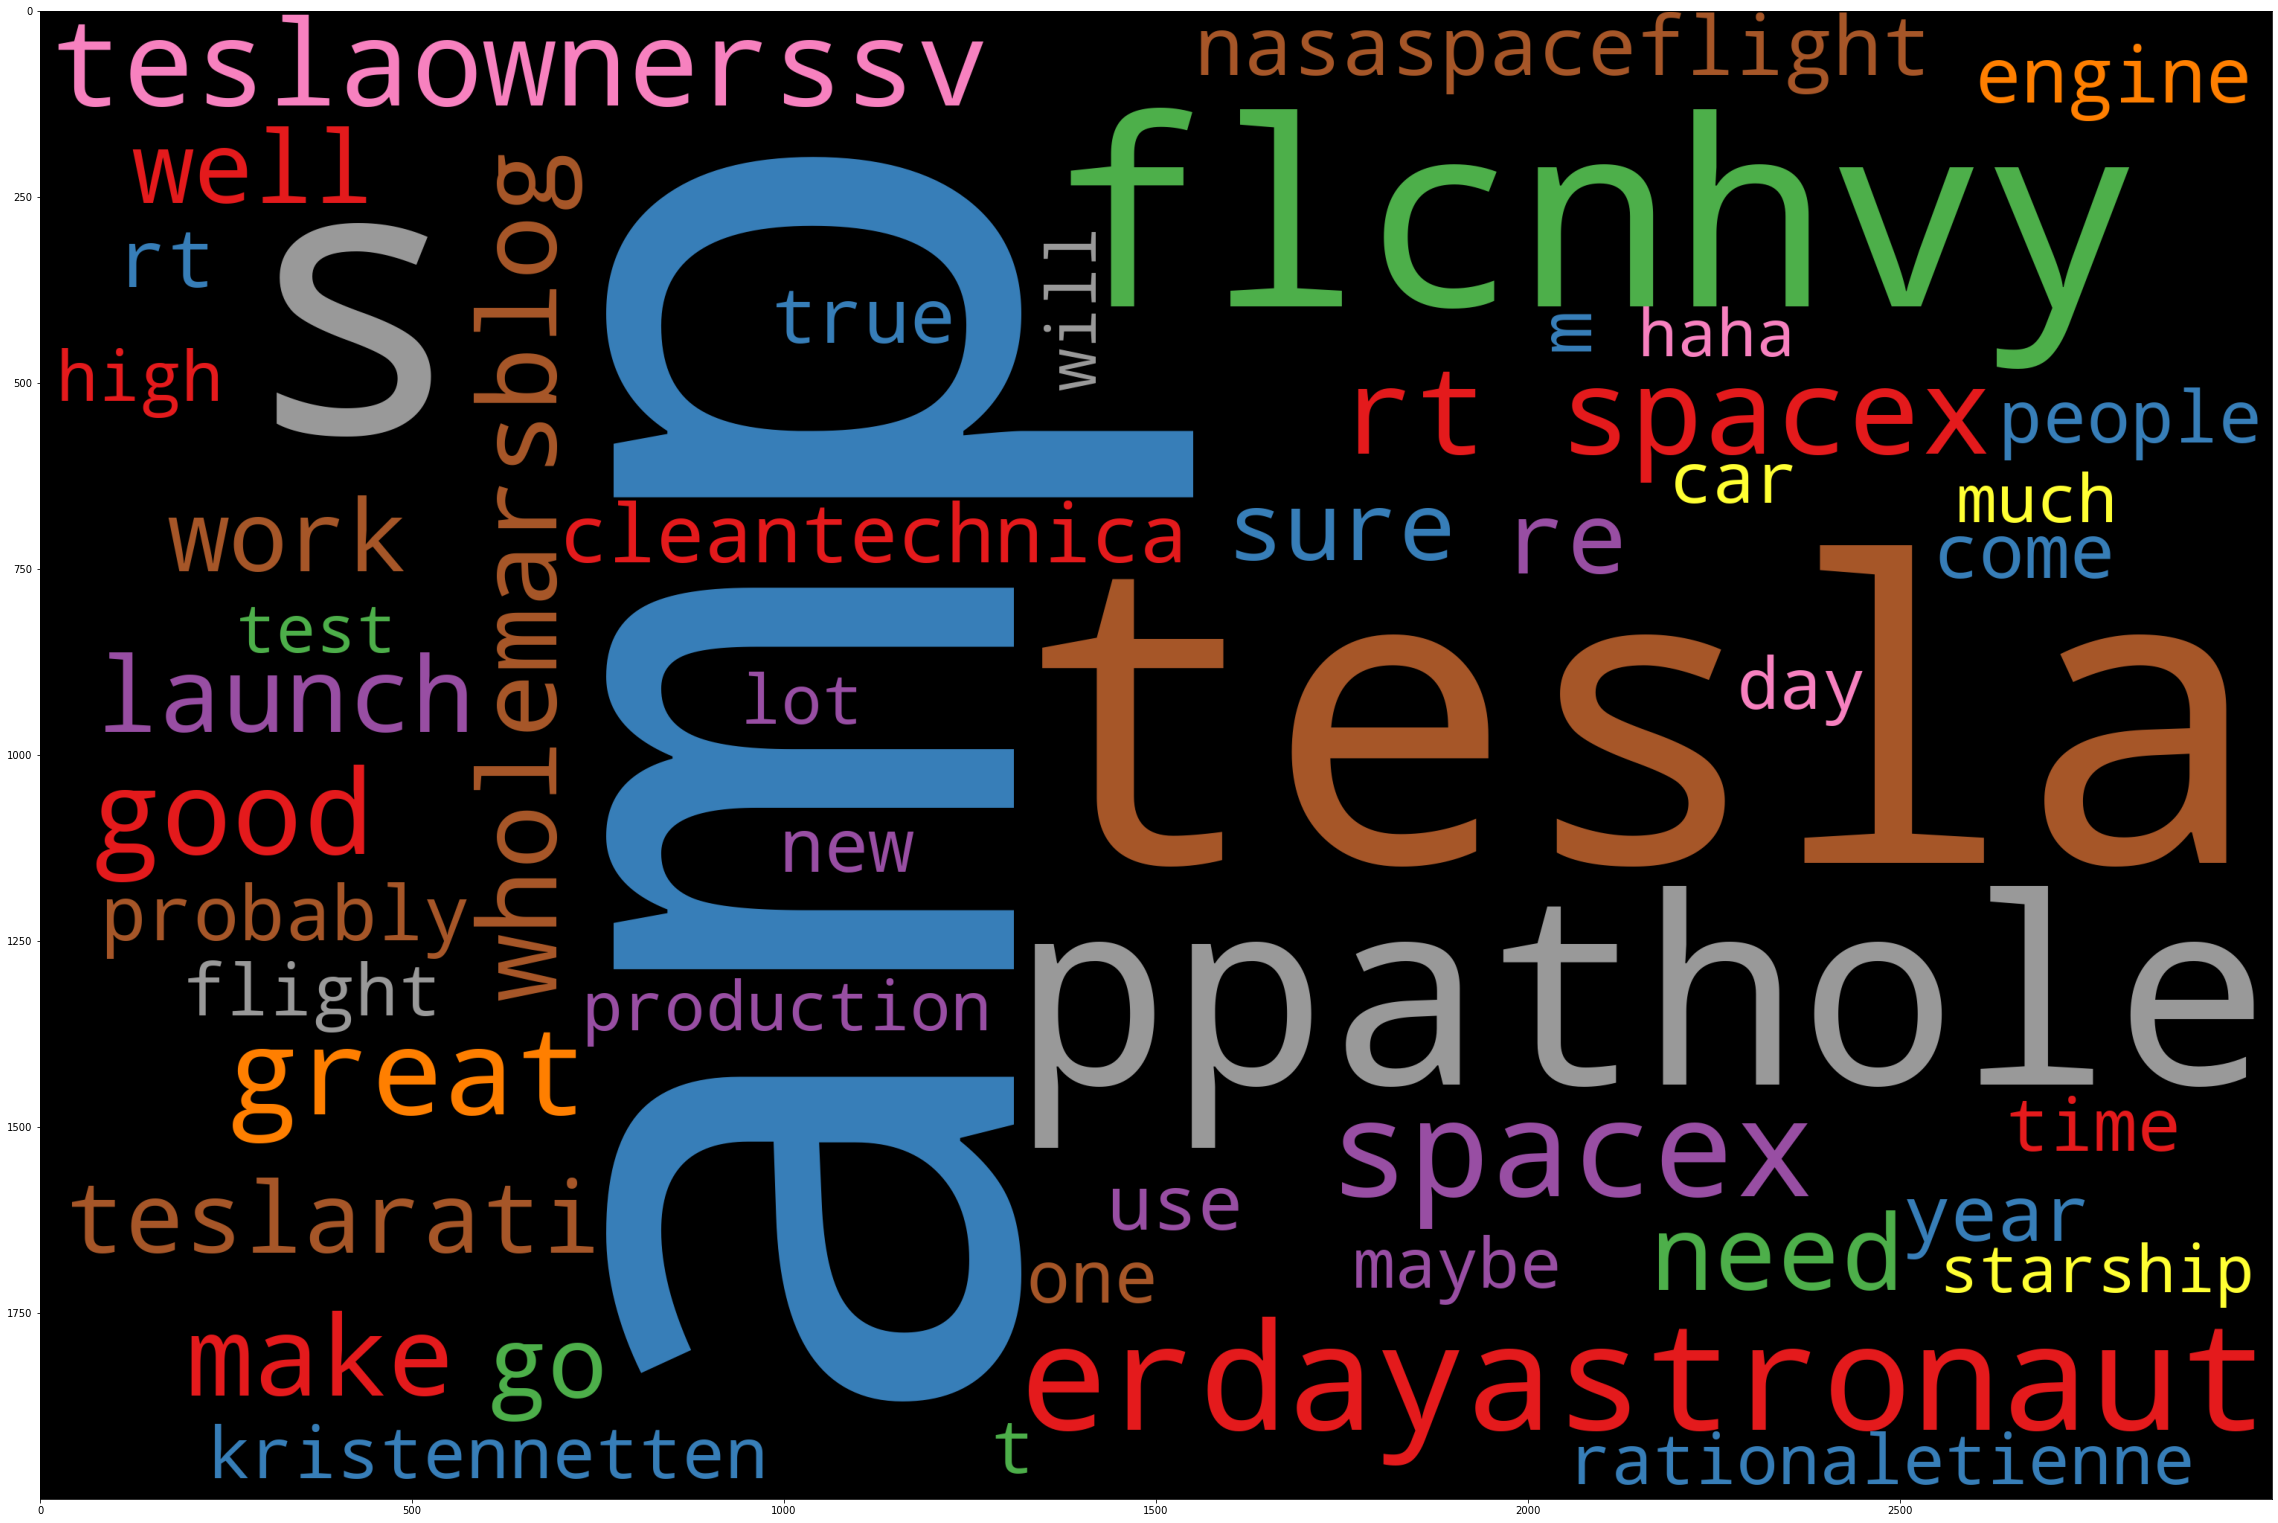

In [62]:
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('on')
    

wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set1',stopwords=STOPWORDS).generate(clean_text)
plot_cloud(wordcloud)

## Named Entity Recognition

In [63]:
nlp=spacy.load('en_core_web_sm')

one_block=clean_text
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [64]:
one_block #noun etc

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't kunalb11 I � m alien idaacarmack ray trace cyberpunk hdr nextle

#### Nouns and Verbs

In [65]:
for token in doc_block[0:20]:
    print(token,token.pos_)

i PRON
me PRON
my PRON
myself PRON
we PRON
our PRON
ours PRON
ourselves PRON
you PRON
you PRON
're AUX
you PRON
've AUX
you PRON
'll AUX
you PRON
'd VERB
your PRON
yours PRON
yourself PRON


In [66]:
nouns_verbs = [token.text for token in doc_block if token.pos_ in ('NOUN', 'VERB')]
print(nouns_verbs[1:20])

['yourselves', 'do', 'doing', 'no', 'own', 't', 'don', 'o', 've', 'aren', 'didn', 'doesn', 'hadn', 'hasn', 'haven', 'isn', 'mightn', 'mustn', 'shouldn']


In [67]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df 
#Viewing top 20 Results

,word,count
0,tesla,141
1,amp,105
2,spacex,72
3,erdayastronaut,71
4,make,64
...,...,...
2311,answer,1
2312,tweet,1
2313,priority,1
2314,propaganda,1


<AxesSubplot:title={'center':'Top verbs and nouns'}, xlabel='word'>

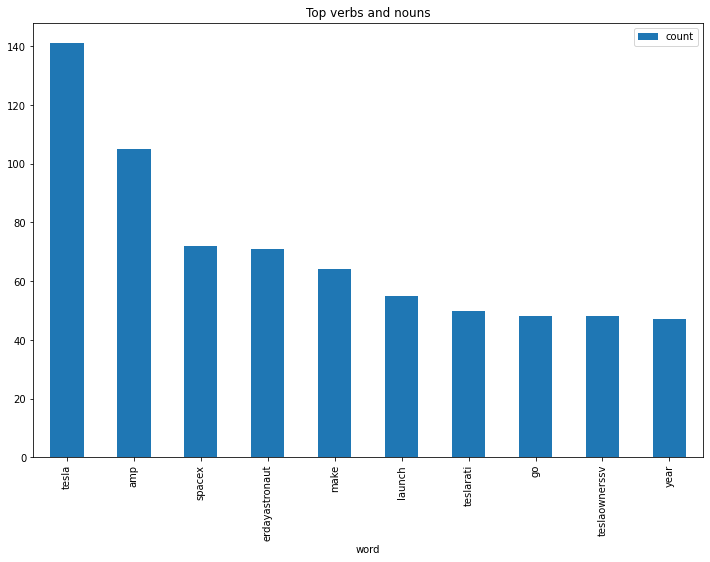

In [68]:
##Visualizing results
#Barchart for top 10 nouns + verbs
wd_df[0:10].plot.bar(x='word', figsize=(12,8), title='Top verbs and nouns')

## Emotion Mining

In [69]:
from nltk import tokenize
sentences=tokenize.sent_tokenize(' '.join(musk))
sentences

['@kunalb11 I�m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It�s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [70]:
sent_df=pd.DataFrame(sentences,columns=['sentence'])
sent_df

,sentence
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
909,"@kenyanwalstreet Not actually a payout, just a..."
910,"It may never pay out, as the stock can�t b� ht..."
911,Details Aug 28.
912,AI symbiosis while u wait @vistacruiser7 @flcn...


In [71]:
# Emotion Lexicon - Affin
affin=pd.read_csv('Afinn.csv',sep=',',encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [72]:
affinity_scores=affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [73]:
nlp=spacy.load('en_core_web_sm')
sentiment_lexicon=affinity_scores

def calculate_sentiment(text:str=None):
    sent_score=0
    if text:
        sentence=nlp(text)
        for word in sentence:
            sent_score+=sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [74]:
# test that it works
calculate_sentiment(text = 'amazing') #score for amazing is 4

4

In [75]:
calculate_sentiment(text = 'great') #score for great is 3

3

In [76]:
sent_df['sentiment_value']=sent_df['sentence'].apply(calculate_sentiment)
sent_df['sentiment_value']

0      0
1      0
2      3
3      3
4      0
      ..
909    0
910   -4
911    0
912   -2
913    0
Name: sentiment_value, Length: 914, dtype: int64

In [77]:
#  words in the sentence
sent_df['word_count'] = sent_df['sentence'].str.split().apply(len)
sent_df['word_count'].head(10)

0     13
1      4
2      4
3     13
4      8
5      6
6     14
7     10
8      8
9    109
Name: word_count, dtype: int64

In [78]:
sent_df.sort_values(by='sentiment_value').tail(10)

,sentence,sentiment_value,word_count
80,@teslaownersSV This is a good one @MrBeastYT I...,10,38
222,"@PPathole @karpathy For a second there, I thou...",11,69
808,Might be able to� https://t.co/FB7e5nOq2E @Pri...,11,72
182,"Also, w� https://t.co/IYdKttVsqk @cleantechnic...",12,99
42,"@thejackbeyer @NASASpaceflight Cryoproof, then...",12,85
638,It�s� https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
578,The �open� areas� https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94
710,We just haven�t observed the� https://t.co/mez...,17,72


In [79]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
640,Very ba� https://t.co/tJsh1Exz1Q @justpaulinel...,-8,60
828,Cool Model 3 review by @iamjamiefoxx https://t...,-8,61
64,"Also, the road to hell is mostly paved with ba...",-7,11
473,"He plays the �poor inventor� card, but was ric...",-5,34
604,"Then static fire, checkouts, static fire, fly ...",-4,12
...,...,...,...
638,It�s� https://t.co/IxhyT6NuiC @Teslarati Tesla...,13,65
578,The �open� areas� https://t.co/rabjKrtQlw @Sav...,14,138
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94


In [80]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() #more mean more +

count    914.000000
mean       1.332604
std        2.665936
min       -8.000000
25%        0.000000
50%        0.000000
75%        3.000000
max       17.000000
Name: sentiment_value, dtype: float64

#### sentiment val less than 0

In [81]:
# Sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0].head() 

,sentence,sentiment_value,word_count
0,@kunalb11 I�m an alien @ID_AA_Carmack Ray trac...,0,13
1,Have you tried it?,0,4
4,Now on to the next for even more!!,0,8
5,Happy New Year of the Ox!,0,6
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2,14


#### very happy customers more than 0 i.e. 15

In [82]:
sent_df[sent_df['sentiment_value']>=15].head()

,sentence,sentiment_value,word_count
36,"@ajtourville @Erdayastronaut @SpaceX Yes, but ...",15,231
104,@Erdayastronaut @SpaceX Was also thinking that...,16,94
710,We just haven�t observed the� https://t.co/mez...,17,72


In [83]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

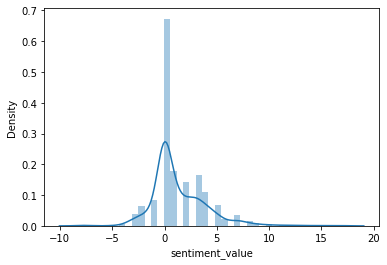

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(sent_df['sentiment_value']) 

#### from the above we conclude that more people are neutral i.e. less than or equal to 0

<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

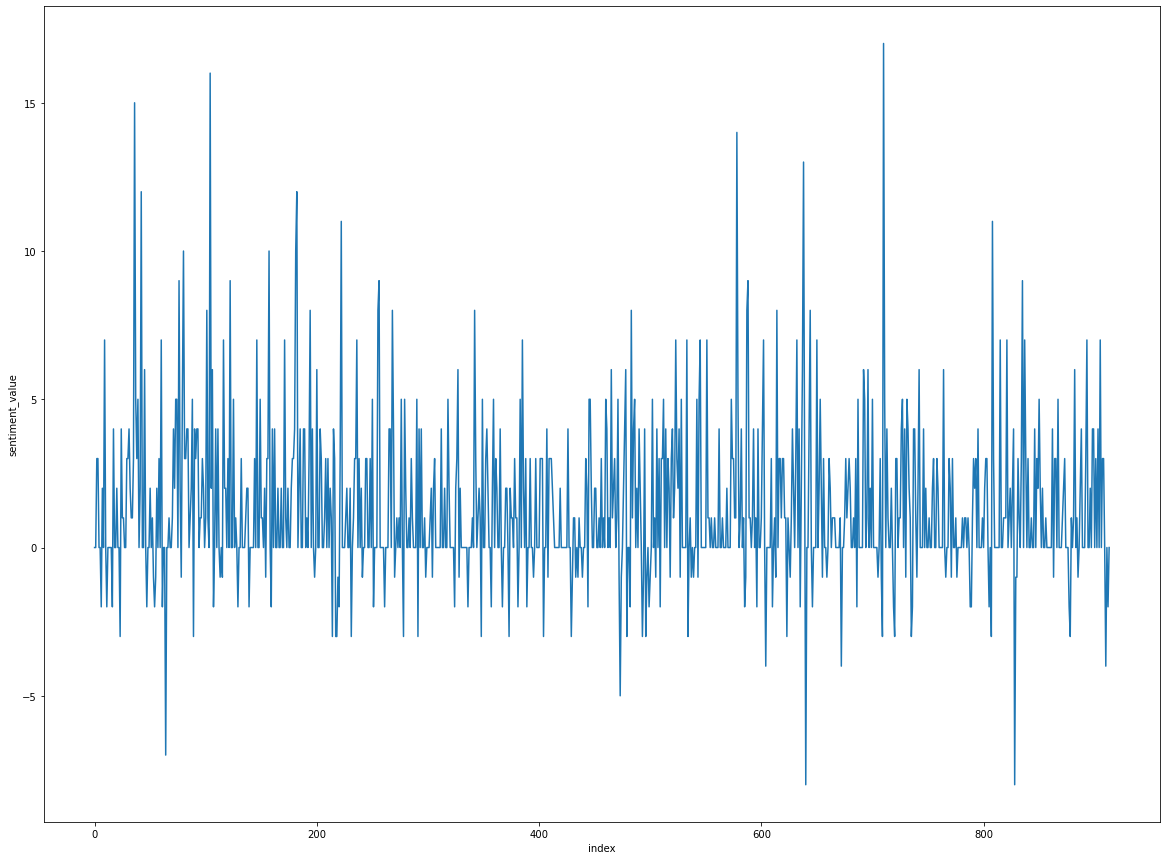

In [85]:
plt.figure(figsize=(20, 15))
sns.lineplot(y='sentiment_value',x='index',data=sent_df)

#### Relationship between word_count and sentiment_value like if user is using more words is it a negative or positive

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

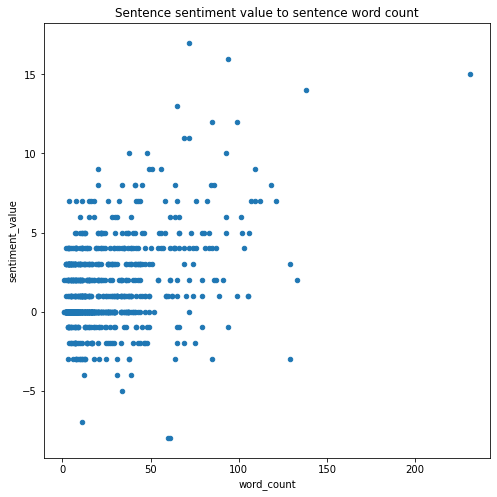

In [86]:
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

In [87]:
from autoscraper import AutoScraper

In [88]:
url = 'https://www.amazon.in/Apple-MacBook-14-inch-8%E2%80%91core-14%E2%80%91core/dp/B09JR8TX74'
wanted_list = ['The M1 is an incredible chip.']

In [89]:
scraper= AutoScraper()
result=scraper.build(url,wanted_list)
print(result)

['The media could not be loaded.', 'Best laptop for pros.', 'The M1 is an incredible chip.', "'Feels like a Powerbook, looks like a Notchbook and performs like a maxbook'.This is the most powerful and at the same time most efficient laptop that you can get in the market at this point of time. Apple future proofed this Macbook owing to a decade long wait for design change. I can vouch that for 99% of the people looking to buy a laptop this is going to be a overkill.PROS:1. Best display you can get on a laptop period.2. Ports are back!!!3. 14 inch is the best balance for professional and productivity work4. The speaker and microphone quality are phenomenal. Adding to that the 1080p facetime camera is a great improvement5. Performance is a no brainer. Apple's unified silicon given the best performance with the best battery life. Plugged in or not it's miles ahead of any windows laptop. It rivals the likes of many full fledged PCs.6 The trackpad and keyboard are the best atleast in my acco

# Emotion Analysis

In [90]:
from nltk import tokenize
sentences= tokenize.sent_tokenize(" ".join(result))
sentences[0:]

['The media could not be loaded.',
 'Best laptop for pros.',
 'The M1 is an incredible chip.',
 "'Feels like a Powerbook, looks like a Notchbook and performs like a maxbook'.This is the most powerful and at the same time most efficient laptop that you can get in the market at this point of time.",
 'Apple future proofed this Macbook owing to a decade long wait for design change.',
 'I can vouch that for 99% of the people looking to buy a laptop this is going to be a overkill.PROS:1.',
 'Best display you can get on a laptop period.2.',
 'Ports are back!!!3.',
 '14 inch is the best balance for professional and productivity work4.',
 'The speaker and microphone quality are phenomenal.',
 'Adding to that the 1080p facetime camera is a great improvement5.',
 'Performance is a no brainer.',
 "Apple's unified silicon given the best performance with the best battery life.",
 "Plugged in or not it's miles ahead of any windows laptop.",
 'It rivals the likes of many full fledged PCs.6 The trackp

In [91]:
sent_df = pd.DataFrame(sentences, columns=['Reviews'])
sent_df 

,Reviews
0,The media could not be loaded.
1,Best laptop for pros.
2,The M1 is an incredible chip.
3,"'Feels like a Powerbook, looks like a Notchboo..."
4,Apple future proofed this Macbook owing to a d...
5,I can vouch that for 99% of the people looking...
6,Best display you can get on a laptop period.2.
7,Ports are back!!!3.
8,14 inch is the best balance for professional a...
9,The speaker and microphone quality are phenome...


In [92]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [94]:
#Custom function :score each word in a sentence in lemmatised form, 
#but calculate the score for the whole original sentence.
nlp = spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score 

In [95]:
sent_df['sentiment_value'] = sent_df['Reviews'].apply(calculate_sentiment) 

In [96]:
# how many words are in the sentence?
sent_df['word_count'] = sent_df['Reviews'].str.split().apply(len)
sent_df['word_count']

0      6
1      4
2      6
3     37
4     14
5     21
6      9
7      3
8     11
9      7
10    11
11     5
12    12
13    11
14    20
15    11
16    26
17    15
18    14
19    17
20    11
21    21
22    16
23    12
24    25
25    12
26    36
27     9
28    13
29     3
30    13
31    15
32    26
33    11
34    34
35     9
36    35
37     8
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     1
47     1
48     1
49     1
Name: word_count, dtype: int64

In [97]:
sent_df

,Reviews,sentiment_value,word_count
0,The media could not be loaded.,0,6
1,Best laptop for pros.,3,4
2,The M1 is an incredible chip.,0,6
3,"'Feels like a Powerbook, looks like a Notchboo...",8,37
4,Apple future proofed this Macbook owing to a d...,0,14
5,I can vouch that for 99% of the people looking...,0,21
6,Best display you can get on a laptop period.2.,3,9
7,Ports are back!!!3.,0,3
8,14 inch is the best balance for professional a...,3,11
9,The speaker and microphone quality are phenome...,0,7


In [98]:
# Sentiment score of the whole review
sent_df['sentiment_value'].describe() 

count    50.000000
mean      1.540000
std       2.851494
min      -2.000000
25%       0.000000
50%       0.000000
75%       3.000000
max      11.000000
Name: sentiment_value, dtype: float64

In [99]:
sent_df['index']=range(0,len(sent_df))

<AxesSubplot:xlabel='sentiment_value', ylabel='Density'>

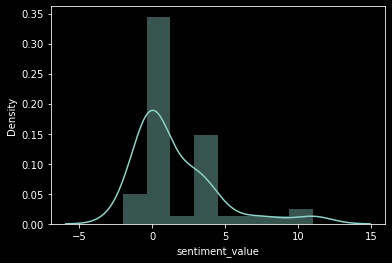

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use(['dark_background'])
sns.distplot(sent_df['sentiment_value']) 

In [101]:
print(sent_df['sentiment_value'].skew())
print(sent_df['sentiment_value'].kurt())

1.8408185724260961
3.5966682724419528


### more skewness means positive sentiments

In [104]:
sent_df[sent_df['sentiment_value']>=5].head()

,Reviews,sentiment_value,word_count,index
3,"'Feels like a Powerbook, looks like a Notchboo...",8,37,3
12,Apple's unified silicon given the best perform...,7,12,12
14,It rivals the likes of many full fledged PCs.6...,5,20,14
32,"Everything about this laptop is good, trackpad...",11,26,32
33,"Amazing speed, top notch display and sound qua...",11,11,33


In [107]:
sent_df[sent_df['sentiment_value']<0].head()

,Reviews,sentiment_value,word_count,index
11,Performance is a no brainer.,-1,5,11
16,Magsafe 3.0 is greatCONS:If I really have to n...,-2,26,16
34,It's everything you can ask for.The brownie po...,-1,34,34
35,The sharp design gets little uncomfortable in ...,-2,9,35


<AxesSubplot:xlabel='index', ylabel='sentiment_value'>

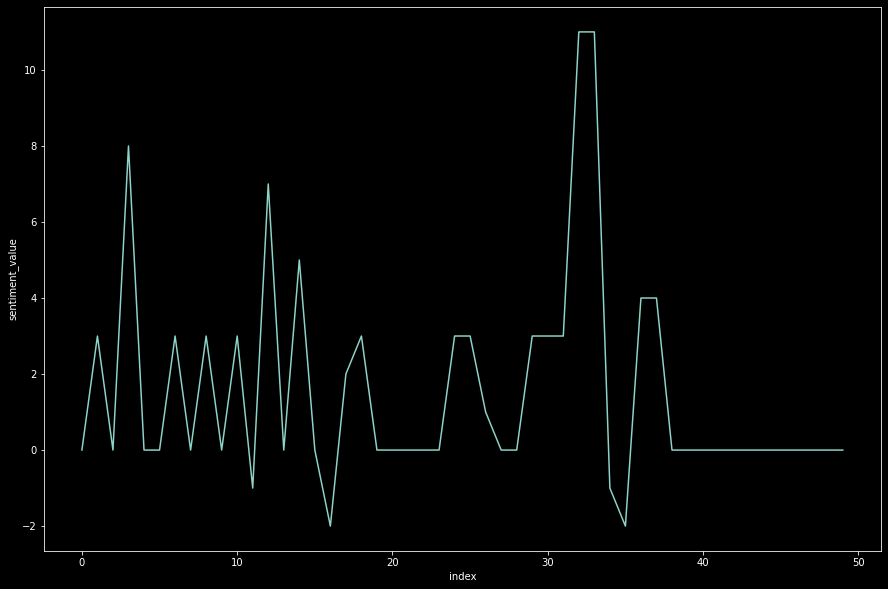

In [108]:
plt.figure(figsize=(15, 10))
plt.style.use(['dark_background'])
sns.lineplot(y='sentiment_value',x='index',data=sent_df) 

<AxesSubplot:title={'center':'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment_value'>

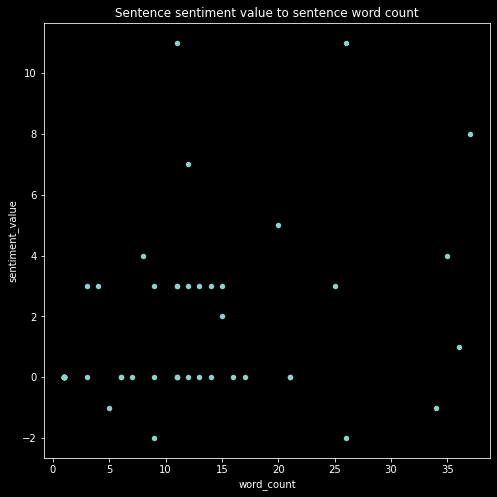

In [110]:
plt.style.use(['dark_background'])
sent_df.plot.scatter(x='word_count', y='sentiment_value', figsize=(8,8), title='Sentence sentiment value to sentence word count')

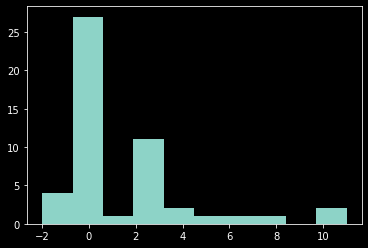

<Figure size 1080x720 with 0 Axes>

In [116]:
#another style for visualisation
plt.hist(sent_df['sentiment_value'])
plt.figure(figsize=(15,10))
xlabel='sentiment_value'

## By Analysis we observed that most of the reviews have sentiment value greater than zero i.e. there are more of Positive reviews about Apple laptop